# **Project Sistem Prediksi Popularitas Anime**

Project ini bertujuan untuk membuat model memprediksi jumlah anggota pada suatu anime berdasarkan fitur-fitur seperti peringkat, skor, jumlah episode, genre, studio, musim tayang, dan tahun tayang. Dengan kata lain, project ini untuk membuat model untuk mengetahui seberapa populer suatu anime berdasarkan karakteristiknya.

- **Dataset** : MyAnimeList melalui JikanAPI (8329 Data)
- **Algoritma** : Random Forest, Linear Regression, dan Ridge Regression
- **Evaluasi** : MAE, RMSE, dan R2

# **Data Scrapping**

Mengambil data dari **Myanimelist** melalui **JikanAPI**. Data yang diambil :
- Rank : Ranking Anime
- Title : Judul Anime
- Score : Rating Anime (0-10)
- Episodes : Jumlah Episodes di setiap Anime
- Members : Jumlah pengguna yang telah menambahkan anime tertentu ke daftar mereka
- Genre : Daftar genre di setiap Anime
- Studio : Studio yang memproduksi Anime tersebut
- Status : Status anime apakah sudah tamat atau masih tayang.
- Premiered : Waktu rilis dalam anime dalam format musim dan tahun

In [1]:
import requests
import pandas as pd
import time
from datetime import datetime

anime_data = []
page = 1

# Fungsi untuk konversi aired.from ke premiered (Spring, Summer, Fall, Winter)
def convert_to_premiered(aired_from):
    if not aired_from:
        return None
    try:
        date_obj = datetime.fromisoformat(aired_from.replace('Z', ''))
        month = date_obj.month
        year = date_obj.year

        if month in [1, 2, 3]:
            season = 'Winter'
        elif month in [4, 5, 6]:
            season = 'Spring'
        elif month in [7, 8, 9]:
            season = 'Summer'
        else:
            season = 'Fall'

        return f"{season} {year}"
    except:
        return None

while True:
    url = f"https://api.jikan.moe/v4/anime?page={page}"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Request gagal di halaman {page}. Stop.")
        break

    data = response.json()
    anime_list = data.get('data', [])

    if not anime_list:
        print("Tidak ada data lagi. Selesai.")
        break

    for anime in anime_list:
        if anime.get('type') == 'TV':
            aired_from = anime['aired']['from'] if anime.get('aired') and anime['aired'].get('from') else None
            anime_data.append({
                  'rank': anime.get('rank', None),
                  'title': anime.get('title', None),
                  'score': anime.get('score', None),
                  'episodes': anime.get('episodes', None),
                  'members': anime.get('members', None),
                  'genre': ', '.join([genre['name'] for genre in anime.get('genres', [])]),
                  'studio': ', '.join([studio['name'] for studio in anime.get('studios', [])]),
                  'status': anime.get('status', None),
                  'premiered': convert_to_premiered(aired_from)
            })

    print(f"Halaman {page} selesai. Total TV anime: {len(anime_data)}")
    page += 1
    time.sleep(1)  # Hindari ban dari server

# Simpan ke file
df = pd.DataFrame(anime_data)
df.to_csv("all_anime_tv(raw).csv", index=False)
print(f"Selesai! Total data anime TV: {len(df)}")

Halaman 1 selesai. Total TV anime: 21
Halaman 2 selesai. Total TV anime: 40
Halaman 3 selesai. Total TV anime: 58
Halaman 4 selesai. Total TV anime: 80
Halaman 5 selesai. Total TV anime: 100
Halaman 6 selesai. Total TV anime: 122
Halaman 7 selesai. Total TV anime: 139
Halaman 8 selesai. Total TV anime: 149
Halaman 9 selesai. Total TV anime: 173
Halaman 10 selesai. Total TV anime: 189
Halaman 11 selesai. Total TV anime: 213
Halaman 12 selesai. Total TV anime: 226
Halaman 13 selesai. Total TV anime: 251
Halaman 14 selesai. Total TV anime: 263
Halaman 15 selesai. Total TV anime: 277
Halaman 16 selesai. Total TV anime: 287
Halaman 17 selesai. Total TV anime: 294
Halaman 18 selesai. Total TV anime: 306
Halaman 19 selesai. Total TV anime: 321
Halaman 20 selesai. Total TV anime: 334
Halaman 21 selesai. Total TV anime: 347
Halaman 22 selesai. Total TV anime: 360
Halaman 23 selesai. Total TV anime: 375
Halaman 24 selesai. Total TV anime: 392
Halaman 25 selesai. Total TV anime: 401
Halaman 26 se

# **Data Loading**

Download hasil data scrapping dan menambahkan data secara manual

Menambahkan data secara manual yang masih kosong khususnya di kolom episode. Berikut data yang saya tambahkan:
- One Piece : 1126 Episode
- Detective Conan : 1159 Episode
- Crayon Shinchan : 1267 Episode
- Nintama Rantarou : 2321 Episode
- Sazae-san : 7000 Episode
- Ojarumaru : 1767 Episode
- Doraemon : 1787 Episode
- Bonobono : 454 Episode

Upload hasil data tersebut di notebook untuk diolah lebih lanjut.

In [ ]:
import pandas as pd

anime_df = pd.read_csv("/content/all_anime_tv.csv", encoding='latin-1')

# **Data Cleaning**

Pada tahap ini, dilakukan data cleaning untuk membersikan data. Tujuanya yaitu:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Menganani Nilai Duplikat**  
   - Identifikasi dan analisis data yang duplikat. Tentukan langkah-langkah yang diperlukan untuk menangani data duplikat, seperti penghapusan data tersebut.

In [ ]:
anime_df.describe()

,rank,score,episodes,members
count,8034.000000,5045.000000,7972.000000,8.329000e+03
mean,10147.416853,6.838301,40.440040,1.000899e+05
std,6705.990033,0.805489,124.450456,2.809246e+05
min,0.000000,2.880000,1.000000,1.000000e+00
25%,4122.250000,6.300000,12.000000,1.520000e+02
50%,9083.000000,6.820000,25.000000,4.044000e+03
75%,16476.750000,7.380000,49.000000,6.529900e+04
max,21666.000000,9.300000,7701.000000,4.146711e+06


In [ ]:
anime_df.head()

,rank,title,score,episodes,members,genre,studio,status,premiered
0,47.0,Cowboy Bebop,8.75,26.0,1962683,"Action, Award Winning, Sci-Fi",Sunrise,Finished Airing,Spring 1998
1,369.0,Trigun,8.22,26.0,798833,"Action, Adventure, Sci-Fi",Madhouse,Finished Airing,Spring 1998
2,3193.0,Witch Hunter Robin,7.24,26.0,122551,"Action, Drama, Mystery, Supernatural",Sunrise,Finished Airing,Summer 2002
3,4741.0,Bouken Ou Beet,6.93,52.0,16242,"Action, Adventure, Fantasy",Toei Animation,Finished Airing,Summer 2004
4,806.0,Eyeshield 21,7.91,145.0,190304,Sports,Gallop,Finished Airing,Spring 2005


In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       8034 non-null   float64
 1   title      8329 non-null   object 
 2   score      5045 non-null   float64
 3   episodes   7972 non-null   float64
 4   members    8329 non-null   int64  
 5   genre      7057 non-null   object 
 6   studio     5562 non-null   object 
 7   status     8329 non-null   object 
 8   premiered  7798 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 585.8+ KB


In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = anime_df.isnull().sum()
missing_values[missing_values > 0]

,0
rank,295
score,3284
episodes,357
genre,1272
studio,2767
premiered,531


In [ ]:
missing_values = anime_df.isnull().sum()
print(missing_values[missing_values > 0])

rank          295
score        3284
episodes      357
genre        1272
studio       2767
premiered     531
dtype: int64


**Pengananan Missing Value**

- `anime_df_clean`: Membuat data copy agar data asli `anime_df` tetap utuh dan tidak terpengaruh oleh proses pembersihan data.

- `score`: Menghapus kolom yang berisi nilai kosong.

- `rank`: Missing value diisi dengan nilai -1, sebagai penanda bahwa data tersebut tidak tersedia atau tidak diketahui.

- `episodes`: Diisi dengan nilai median. Median digunakan karena lebih tahan terhadap outlier daripada (mean).

- `genre`, `studio,` dan `premiered`:  Diisi dengan label `'Unknown'`. Ini membantu menjaga konsistensi tipe data dan memungkinkan model atau analisis tetap mengenali bahwa nilai tersebut tidak tersedia.

In [ ]:
# Menggunakan Data Copy
anime_df_clean = anime_df.copy()

# 1. Drop rows dengan 'score' missing
anime_df_clean = anime_df_clean.dropna(subset=['score'])

# 2. Imputasi kolom lainnya
anime_df_clean['rank'] = anime_df_clean['rank'].fillna(-1)  # atau gunakan .loc
anime_df_clean['episodes'] = anime_df_clean['episodes'].fillna(anime_df_clean['episodes'].median())

# 3. Isi kategori dengan 'Unknown'
anime_df_clean['genre'] = anime_df_clean['genre'].fillna('Unknown')
anime_df_clean['studio'] = anime_df_clean['studio'].fillna('Unknown')
anime_df_clean['premiered'] = anime_df_clean['premiered'].fillna('Unknown')

In [ ]:
print(anime_df_clean.isnull().sum())

rank         0
title        0
score        0
episodes     0
members      0
genre        0
studio       0
status       0
premiered    0
dtype: int64


In [ ]:
# Cek duplikat berdasarkan semua kolom
duplicates = anime_df_clean.duplicated().sum()
print(f"Total duplikat: {duplicates}")

Total duplikat: 14


**Pengananan Nilai Duplikat**

- Menghapus nilai duplikat.

In [ ]:
# Hapus duplikat
anime_df_clean = anime_df_clean.drop_duplicates()

# **Exploratory Data Analysis (EDA)**

Pada tahap ini, dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

2. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

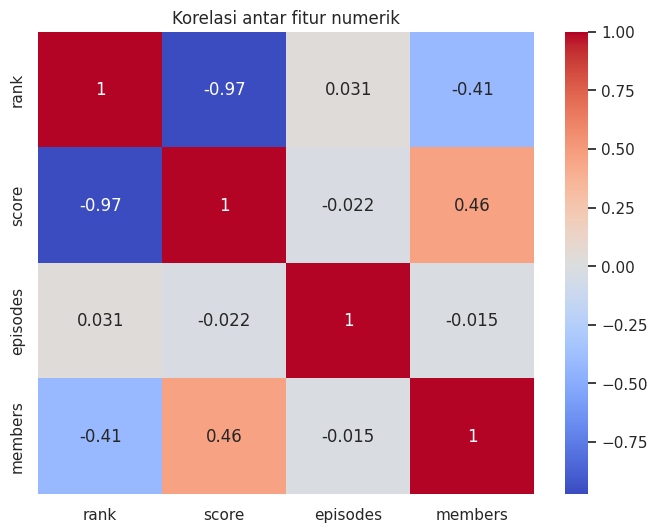

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set gaya visualisasi
sns.set(style="whitegrid")

# 1. Korelasi numerik dengan 'members'
numeric_cols = ['rank', 'score', 'episodes', 'members']
corr_matrix = anime_df_clean[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur numerik')
plt.show()

- `score` punya korelasi positif sedang dengan members (0.46) → sangat relevan untuk regresi.

- `rank` berkorelasi negatif kuat dengan score dan lumayan dengan members (-0.41) → bisa dipakai

- `episodes` tidak berkorelasi signifikan dengan members → kemungkinan bukan prediktor kuat.

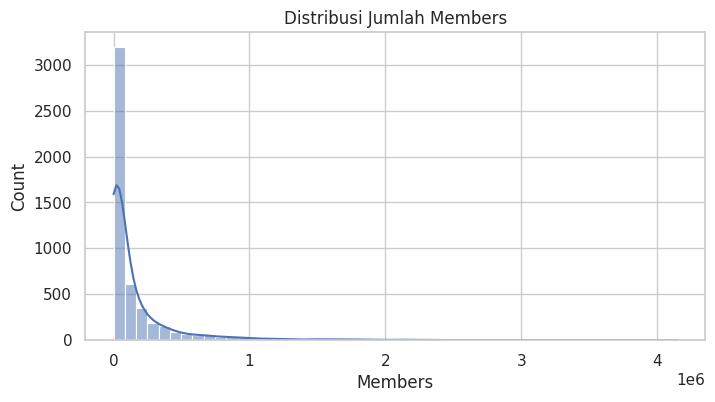

In [ ]:
# 2. Distribusi 'members'
plt.figure(figsize=(8, 4))
sns.histplot(anime_df_clean['members'], bins=50, kde=True)
plt.title('Distribusi Jumlah Members')
plt.xlabel('Members')
plt.show()

- Distribusinya right-skewed (miring ke kanan) → banyak anime punya sedikit anggota, dan hanya sebagian kecil yang sangat populer.

- Bisa dipertimbangkan log-transform members saat modeling untuk stabilkan varian.

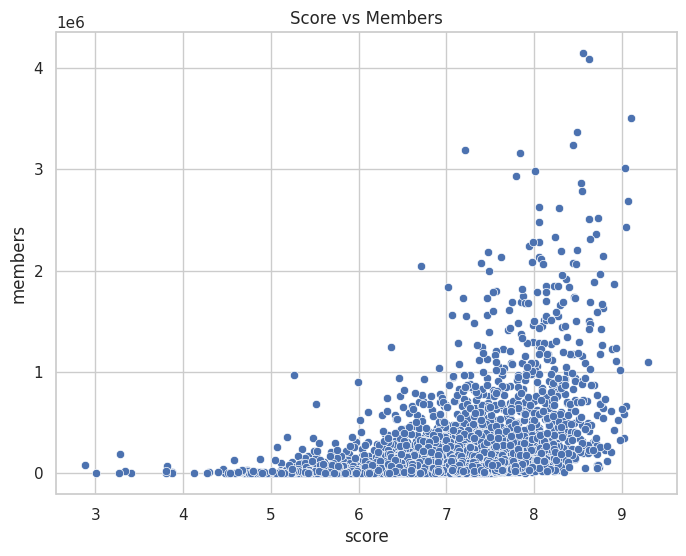

In [ ]:
# 3. Hubungan score vs members
plt.figure(figsize=(8, 6))
sns.scatterplot(x='score', y='members', data=anime_df_clean)
plt.title('Score vs Members')
plt.show()

- **Score vs Members** → terlihat adanya pola menaik, tapi menyebar → menunjukkan korelasi positif yang tidak terlalu linear.


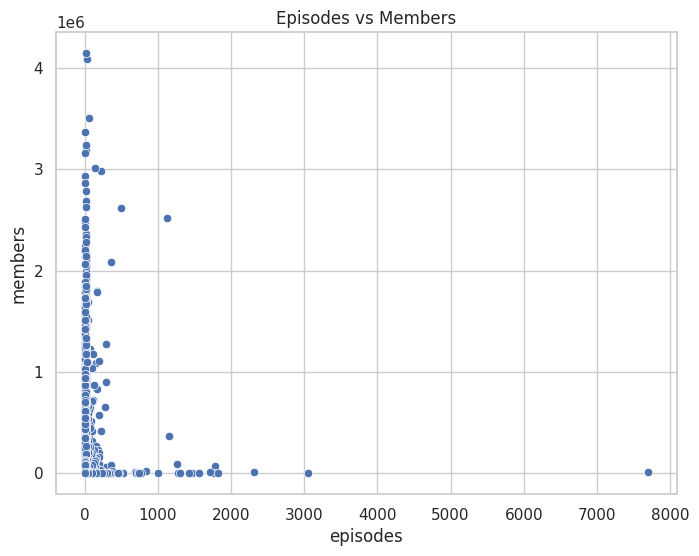

In [ ]:
# 4. Hubungan episodes vs members
plt.figure(figsize=(8, 6))
sns.scatterplot(x='episodes', y='members', data=anime_df_clean)
plt.title('Episodes vs Members')
plt.show()

- **Episodes vs Members** → tidak ada pola jelas, dan tampak banyak outlier → bukan fitur penting.

<ipython-input-15-17f2cae65c71>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_members.values, y=avg_members.index, palette='viridis')


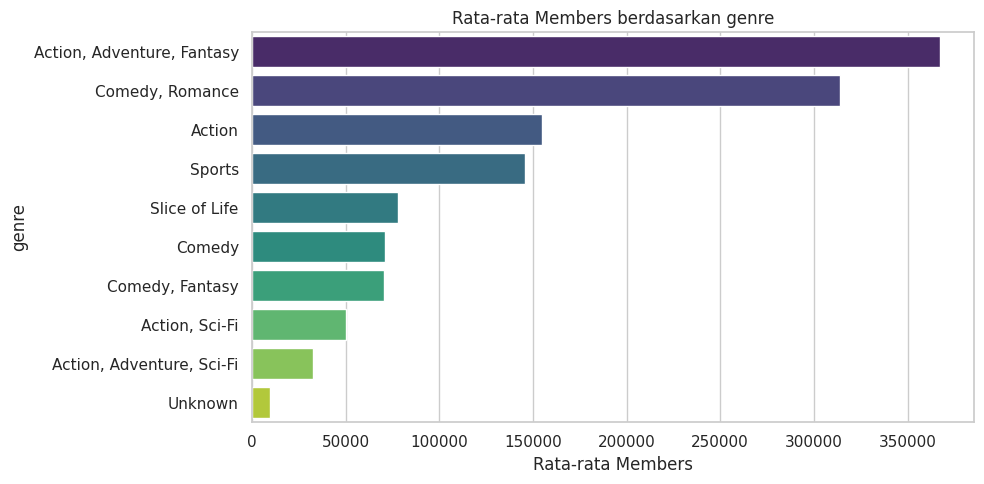

<ipython-input-15-17f2cae65c71>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_members.values, y=avg_members.index, palette='viridis')


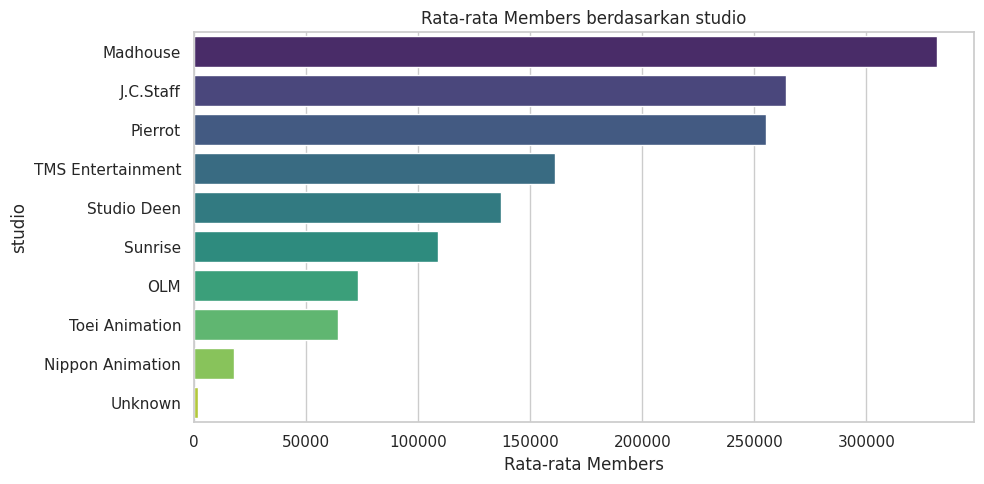

<ipython-input-15-17f2cae65c71>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_members.values, y=avg_members.index, palette='viridis')


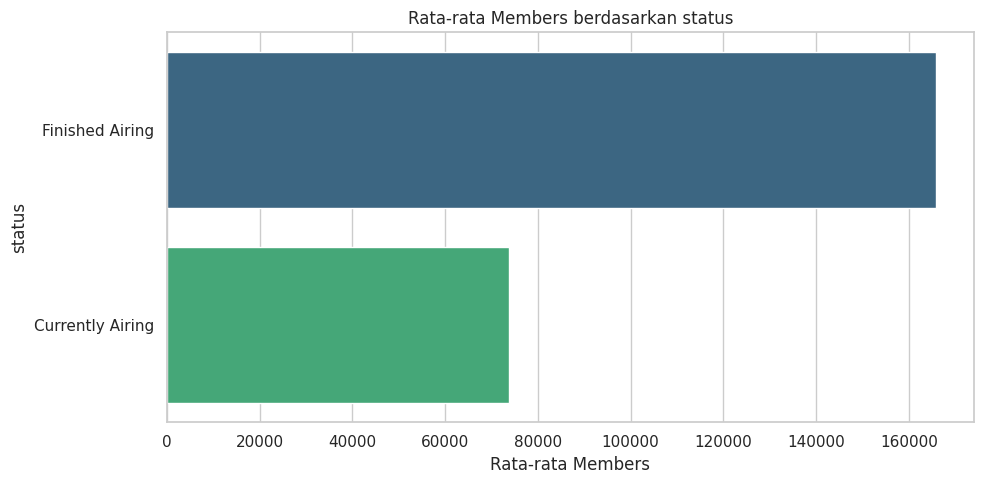

<ipython-input-15-17f2cae65c71>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_members.values, y=avg_members.index, palette='viridis')


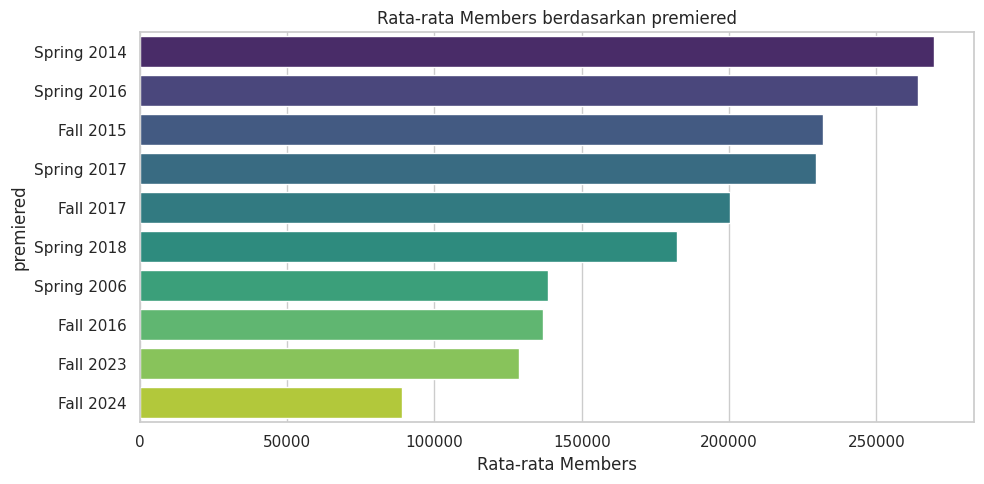

In [ ]:
# 5. Rata-rata members berdasarkan kategori fitur kategori
cat_features = ['genre', 'studio', 'status', 'premiered']
for col in cat_features:
    top_categories = anime_df_clean[col].value_counts().nlargest(10).index
    avg_members = anime_df_clean[anime_df_clean[col].isin(top_categories)].groupby(col)['members'].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=avg_members.values, y=avg_members.index, palette='viridis')
    plt.title(f'Rata-rata Members berdasarkan {col}')
    plt.xlabel('Rata-rata Members')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

**Genre:**
- Action, Adventure, Fantasy dan Comedy, Romance punya members tertinggi.

- Genre bisa jadi fitur penting, terutama jika dikelola jadi fitur multi-label.

**Studio:**
- Studio seperti Madhouse, J.C.Staff, dan Pierrot menarik banyak members.

- Bisa encode top-N studio sebagai fitur dummy.

**Status:**
- Finished Airing jauh lebih populer daripada Currently Airing.

**Premiered:**
- Tahun-tahun seperti Spring 2014, Spring 2016, Fall 2015 banyak menghasilkan anime populer.

- Bisa diolah menjadi fitur musim dan tahun.

# **Data Preprocessing**

- Encoding fitur kategorikal (`genre`, `studio`) menggunakan `MultiLabelBinarizer` (karena data lebih dari 1), agar model bisa membaca variabel kategorikal.
- Membuat `anime_encoded_df` agar dikhususkan untuk persiapan data training.
- Membuat `anime_encoded_df` dan membuang fitur `genre` dan `studio` agar dikhususkan untuk persiapan data training.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Pastikan nilai dipisah jadi list
anime_df_clean['genre_list'] = anime_df_clean['genre'].apply(lambda x: [i.strip() for i in x.split(',')])
anime_df_clean['studio_list'] = anime_df_clean['studio'].apply(lambda x: [i.strip() for i in x.split(',')])

# Multi-label binarization
mlb_genre = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb_genre.fit_transform(anime_df_clean['genre_list']),
                             columns=mlb_genre.classes_, index=anime_df_clean.index)

mlb_studio = MultiLabelBinarizer()
studio_encoded = pd.DataFrame(mlb_studio.fit_transform(anime_df_clean['studio_list']),
                              columns=mlb_studio.classes_, index=anime_df_clean.index)

# Gabungkan ke dataframe utama
anime_encoded_df = pd.concat([anime_df_clean, genre_encoded, studio_encoded], axis=1)

# Drop kolom aslinya kalau sudah tidak dibutuhkan
anime_encoded_df.drop(['genre', 'genre_list', 'studio', 'studio_list'], axis=1, inplace=True)

# Cek hasil
print(anime_encoded_df.shape)
anime_encoded_df.head()

(5031, 515)


,rank,title,score,episodes,members,status,premiered,Action,Adventure,Avant Garde,...,helo.inc,l-a-unchEE»BOX,lxtl,maroyaka,production doA,soket,studio MOTHER,teamKG,ufotable,yell
0,47.0,Cowboy Bebop,8.75,26.0,1962683,Finished Airing,Spring 1998,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,369.0,Trigun,8.22,26.0,798833,Finished Airing,Spring 1998,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3193.0,Witch Hunter Robin,7.24,26.0,122551,Finished Airing,Summer 2002,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4741.0,Bouken Ou Beet,6.93,52.0,16242,Finished Airing,Summer 2004,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,806.0,Eyeshield 21,7.91,145.0,190304,Finished Airing,Spring 2005,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Melakukan pemisahan data dari kolom `premiered` menjadi `season` dan `year` agar data lebih variatif dan mudah dibaca.
- Mengganti nilai `"Unknown"` menjadi nilai 0 di fitur `year` sebagai penanda bahwa data tersebut tidak tersedia atau tidak diketahui.

In [ ]:
# Split 'premiered' ke 'season' dan 'year'
anime_df_clean['season'] = anime_df_clean['premiered'].apply(lambda x: x.split()[0] if x != 'Unknown' else 'Unknown')
anime_df_clean['year'] = anime_df_clean['premiered'].apply(lambda x: x.split()[1] if x != 'Unknown' else 'Unknown')

# Ganti 'Unknown' dengan 0
anime_df_clean['year'] = anime_df_clean['year'].replace('Unknown', 0)

# Kemudian ubah ke numerik
anime_df_clean['year'] = pd.to_numeric(anime_df_clean['year'], errors='coerce')

- Encoding fitur kategorikal (`premiered`) menggunakan `OneHotEncoder` (karena data cuma ada 1), agar model bisa membaca variabel kategorikal.
- Membua kolom `year` pada `anime_encoded_df`

In [ ]:
# One-hot encode season
season_encoded = pd.get_dummies(anime_df_clean['season'], prefix='season')

# Gabungkan dan buang kolom lama
anime_encoded_df = pd.concat([anime_encoded_df, season_encoded], axis=1)
anime_encoded_df['year'] = anime_df_clean['year']  # tambahkan kembali sebagai kolom numerik

# (Opsional) drop kolom lama 'premiered' jika belum dilakukan
anime_encoded_df.drop(['premiered', 'status'], axis=1, inplace=True, errors='ignore')

# Cek hasil
print(anime_encoded_df.shape)
anime_encoded_df.head()

(5031, 519)


,rank,title,score,episodes,members,Action,Adventure,Avant Garde,Award Winning,Boys Love,...,studio MOTHER,teamKG,ufotable,yell,season_Fall,season_Spring,season_Summer,season_Unknown,season_Winter,year
0,47.0,Cowboy Bebop,8.75,26.0,1962683,1,0,0,1,0,...,0,0,0,0,False,True,False,False,False,1998
1,369.0,Trigun,8.22,26.0,798833,1,1,0,0,0,...,0,0,0,0,False,True,False,False,False,1998
2,3193.0,Witch Hunter Robin,7.24,26.0,122551,1,0,0,0,0,...,0,0,0,0,False,False,True,False,False,2002
3,4741.0,Bouken Ou Beet,6.93,52.0,16242,1,1,0,0,0,...,0,0,0,0,False,False,True,False,False,2004
4,806.0,Eyeshield 21,7.91,145.0,190304,0,0,0,0,0,...,0,0,0,0,False,True,False,False,False,2005


In [ ]:
print(anime_encoded_df.isnull().sum())

rank              0
title             0
score             0
episodes          0
members           0
                 ..
season_Spring     0
season_Summer     0
season_Unknown    0
season_Winter     0
year              0
Length: 519, dtype: int64


# **Modeling**

Model yang digunakan:
- Linear Regression: mudah diinterpretasi, tapi kurang dalam menangani kompleksitas data.
- Random Forest: kuat terhadap overfitting dan dapat menangkap non-linearitas, tapi interpretasinya lebih sulit.
- Ridge Regression: lebih baik dalam mengatasi multikolinearitas.

1. **Linear Regression**
    
    Menggunakan parameter default
    - `fit_intercept=True`: Model akan menghitung intercept (konstanta) dalam persamaan regresi.
    - `copy_X=True`: Data input X akan dicopy untuk menghindari modifikasi data asli.
    - `n_jobs=None`: Semua CPU core akan digunakan untuk komputasi.
    - `positive=False`: Koefisien regresi tidak dibatasi untuk bernilai positif.

2. **Random Forest Regressor**

    Menggunakan parameter default
    - `n_estimators=100`: Jumlah pohon (decision trees) dalam ensemble Random Forest.
    - `random_state=42`: Nilai seed untuk generator angka acak.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Drop kolom non-fitur
X = anime_encoded_df.drop(columns=['title', 'members'])
y = anime_encoded_df['members']

y_log = np.log1p(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2  :", r2_score(y_true, y_pred))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression Performance:
MAE : 0.8609996087452135
RMSE: 1.1051618505324934
R2  : 0.7158624302986842

Random Forest Performance:
MAE : 0.7067276607176105
RMSE: 0.92035067200179
R2  : 0.8029467694815311


Dilakukan **hyperparameter tuning** dengan `RandomizedSearchCV` dengan parameter.

- `n_estimators`: Jumlah pohon (decision trees) dalam ensemble Random Forest. Diuji dengan nilai `[100, 200, 300]`.

- `max_depth`: Kedalaman maksimum setiap pohon. None berarti pohon akan tumbuh hingga semua leaf node murni atau sampai `min_samples_split` terpenuhi. Diuji dengan nilai `[None, 10, 20, 30]`.

- `min_samples_split`: Jumlah minimum sampel yang dibutuhkan untuk membagi sebuah node internal. Diuji dengan nilai `[2, 5, 10]`.

- `min_samples_leaf`: Jumlah minimum sampel yang dibutuhkan untuk menjadi sebuah leaf node. Diuji dengan nilai `[1, 2, 4]`.

- `max_features`: Jumlah fitur yang dipertimbangkan saat mencari split terbaik.
  - `'auto'` (atau None): Menggunakan semua fitur.
  - `'sqrt'` : Menggunakan akar kuadrat dari jumlah fitur.
  - `'log2'` : Menggunakan logaritma basis 2 dari jumlah fitur.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter space untuk dicoba
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  # jumlah kombinasi yang dicoba
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='r2'
)

# Fit ke data training
random_search.fit(X_train, y_train)

# Best Model
best_rf = random_search.best_estimator_

# Evaluasi
y_pred_best = best_rf.predict(X_test)

evaluate_model(y_test, y_pred_best, "Tuned Random Forest")

Fitting 3 folds for each of 30 candidates, totalling 90 fits

Tuned Random Forest Performance:
MAE : 0.7046787732047518
RMSE: 0.9175097553757908
R2  : 0.804161410398084


3. **Ridge Regression**
    
    Menggunakan **hyperparameter tuning** dengan `GridSearchCV` dengan parameter:
    - `alpha`: `GridSearchCV` akan mencoba 5 nilai alpha yang berbeda (`[0.01, 0.1, 1, 10, 100]`) untuk menemukan nilai regularisasi terbaik.
    - `fit_intercept`: `GridSearchCV` akan mencoba dua opsi untuk fit_intercept (`True` dan `False`) untuk menentukan apakah model harus menyertakan intercept atau tidak.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

params = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False]
}

grid = GridSearchCV(ridge, params, cv=3, scoring='r2')
grid.fit(X_train, y_train)

# Evaluasi model terbaik
best_ridge = grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

evaluate_model(y_test, y_pred_ridge, "Tuned Ridge Regression")


Tuned Ridge Regression Performance:
MAE : 0.8715369399134538
RMSE: 1.1138356866758905
R2  : 0.711384834096578


# **Visualisasi Model**

<ipython-input-23-3268f3575c34>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


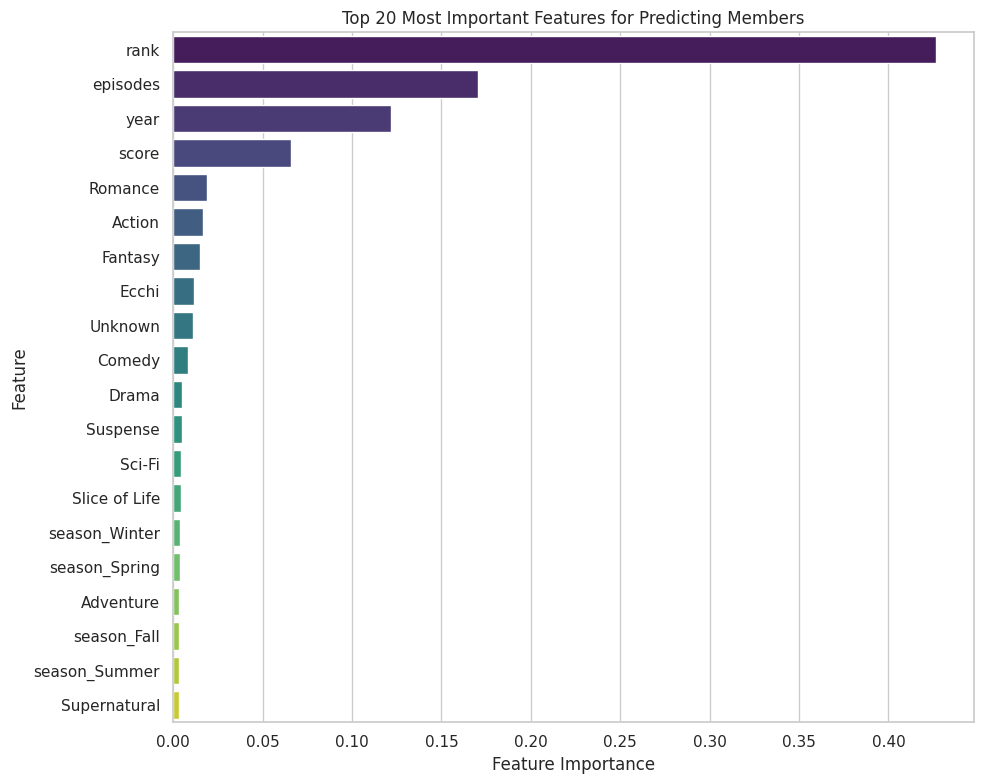

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil importance dari model Random Forest yang sudah ditraining
importances = best_rf.feature_importances_
feature_names = X.columns

# Buat dataframe dan sort
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Lihat 20 fitur teratas
top_features = importance_df.head(20)

# Visualisasi
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 20 Most Important Features for Predicting Members')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Fitur Paling Berpengaruh:**
- `rank`, `score`, dan `year` adalah tiga besar — ini wajar, karena:
 - `rank` biasanya sangat berbanding terbalik dengan popularitas (semakin tinggi popularitas, semakin kecil angkanya).

 - `score` (rating) tentu mencerminkan kualitas menurut penonton.

 - `year` bisa ngasih indikasi efek tren atau jangkauan audiens (anime baru lebih banyak viewers karena ada platform digital?).

- `episodes` juga cukup kuat → mungkin karena anime dengan banyak episode lebih lama tayangnya, jadi lebih banyak yang nonton/jadi member.

**Genre yang Paling Berpengaruh:**
- `Romance`, `Action`, `Fantasy`, `Ecchi`, `Suspense`, `Drama`, `Comedy`

 - Ini semua adalah genre yang cukup umum di anime populer, jadi make sense.

 - Genre `Action` dan `Romance` punya peran penting → artinya anime yang menyasar dua tema ini bisa punya potensi untuk menjangkau lebih banyak penonton.

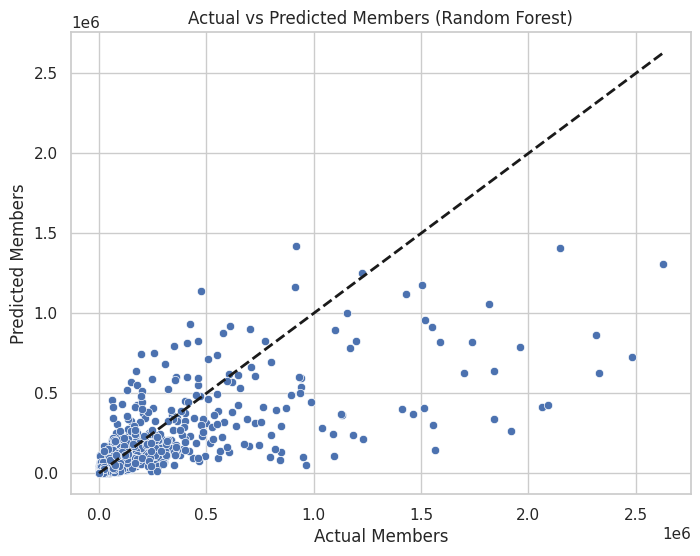

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi pada data test (pastikan y_test dan y_pred_best sudah di-inverse transform jika sebelumnya di-log)
y_pred_best = np.expm1(best_rf.predict(X_test)) # Inverse transform jika perlu
y_test = np.expm1(y_test) # Inverse transform jika perlu

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Garis diagonal
plt.xlabel('Actual Members')
plt.ylabel('Predicted Members')
plt.title('Actual vs Predicted Members (Random Forest)')
plt.show()

**Hasil Intrepetasi Plot**
- Sebagian besar titik terkonsentrasi di bawah garis → artinya model sering underpredict (meremehkan) jumlah members aktual.

- Titik-titik menyebar cukup luas di area members > 500.000, terutama di atas 1 juta → model makin sulit memprediksi anime yang sangat populer secara akurat.

- Sebagian besar prediksi mendekati garis diagonal, terutama untuk anime dengan jumlah members di bawah 500k–1 juta.

- Model kurang mampu menangkap "mega-hit" anime (yang punya > 1 juta members) dengan akurat — tapi ini wajar, karena model cenderung fokus pada data mayoritas (yang jumlah members-nya lebih kecil).



# **Inference**

In [ ]:
import numpy as np
import pandas as pd

def predict_members(anime_input, model, feature_columns):

    # Mulai dengan dataframe kosong satu baris
    input_df = pd.DataFrame([anime_input])

    # Buat dataframe dengan semua kolom yang diperlukan
    encoded_df = pd.DataFrame(columns=feature_columns)
    encoded_df.loc[0] = 0  # isi awal 0

    # Isikan nilai numerik
    for col in ['rank', 'score', 'episodes', 'year']:
        if col in anime_input:
            encoded_df.at[0, col] = anime_input[col]

    # Genre (binary)
    for genre in [
        'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Ecchi',
        'Erotica', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
        'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Unknown'
    ]:
        if genre in anime_input.get("genres", []):
            encoded_df.at[0, genre] = 1

    # Studio
    if anime_input.get("studio") in feature_columns:
        encoded_df.at[0, anime_input['studio']] = 1

    # Season
    if anime_input.get("season") in feature_columns:
        encoded_df.at[0, anime_input['season']] = 1

    # Prediksi log, lalu transform ke skala asli
    log_pred = model.predict(encoded_df)[0]
    predicted_members = np.expm1(log_pred)
    return int(predicted_members)

In [ ]:
# Contoh input anime baru
anime_baru = {
    'rank': 80,
    'score': 8.2,
    'episodes': 12,
    'year': 2025,
    'genres': ['Romance', 'Fantasy'],
    'studio': 'ufotable',
    'season': 'season_Spring',
}

# Prediksi
predicted = predict_members(anime_baru, best_rf, X_train.columns)
print(f"Prediksi jumlah members: {predicted:,}")

Prediksi jumlah members: 245,122


<ipython-input-26-943155e89abf>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  encoded_df.at[0, col] = anime_input[col]
